In [1]:
import pandas as pd
import numpy as np
import sqlite3
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid_cases = pd.read_csv("cases_by_day.txt")

In [3]:
conn = sqlite3.connect("mta_data.db")

df = pd.read_sql_query("SELECT * FROM mta_data", conn)
df.columns = [column.strip() for column in df.columns]

In [4]:
# Combine date and time fields into a single datetime column
# Taken from MTA 1 solutions
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

covid_cases["DATE_TIME"] = pd.to_datetime(covid_cases.date_of_interest, format="%m/%d/%Y")

In [5]:
# Get rid of the duplicate entry
# Taken from MTA 1 solutions
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

# Drop Desc Column
# Taken from MTA 1 solutions
df = df.drop(["DESC"], axis=1, errors="ignore")

In [6]:
# dataframe with covid case count for dates during lockdown through reopening
covid_spike = covid_cases.loc[(covid_cases["DATE_TIME"] >= "2020-03-01")
                       & (covid_cases["DATE_TIME"] < "2020-09-01")]


# dataframe with all dates for Dec 2019 - Feb 2020
df_prelockdown = df.loc[(df["DATE_TIME"] >= "2019-12-01") 
                       & (df["DATE_TIME"] < "2020-03-01")]

# dataframe with all dates for Mar 2020 - May 2020
df_lockdown = df.loc[(df["DATE_TIME"] >= "2020-03-01")
                    & (df["DATE_TIME"] < "2020-06-01")]

# dataframe with all dates for June 2020 - Aug 2020
df_reopening = df.loc[(df["DATE_TIME"] >= "2020-06-01")
                     & (df["DATE_TIME"] < "2020-09-01")]


In [7]:
# Only stations that are on L line
df_prelockdown_L = df_prelockdown.loc[(df["LINENAME"].str.contains("L"))]
df_lockdown_L = df_lockdown.loc[(df["LINENAME"].str.contains("L"))]
df_reopening_L = df_reopening.loc[(df["LINENAME"].str.contains("L"))]

# Getting the higest number of entries for the day
df_prelockdown_L_entries = (df_prelockdown_L.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_L_entries = (df_lockdown_L.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_L_entries = (df_reopening_L.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [8]:
# Set up for calculating daily entries
df_prelockdown_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_L_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_L_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_L_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-8-3b7608d26c4c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-8-3b7608d26c4c>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-8-3b7608d26c4c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_L_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_L_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.s

In [9]:
# Only stations that are on A line
df_prelockdown_A = df_prelockdown.loc[(df["LINENAME"].str.contains("A"))]
df_lockdown_A = df_lockdown.loc[(df["LINENAME"].str.contains("A"))]
df_reopening_A = df_reopening.loc[(df["LINENAME"].str.contains("A"))]

# Getting the higest number of entries for the day
df_prelockdown_A_entries = (df_prelockdown_A.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_A_entries = (df_lockdown_A.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_A_entries = (df_reopening_A.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [10]:
# Set up for calculating daily entries
df_prelockdown_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_A_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_A_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_A_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-10-73b951716473>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-10-73b951716473>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-10-73b951716473>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_A_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_A_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [11]:
# Only stations that are on B line
df_prelockdown_B = df_prelockdown.loc[(df["LINENAME"].str.contains("B"))]
df_lockdown_B = df_lockdown.loc[(df["LINENAME"].str.contains("B"))]
df_reopening_B = df_reopening.loc[(df["LINENAME"].str.contains("B"))]

# Getting the higest number of entries for the day
df_prelockdown_B_entries = (df_prelockdown_B.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_B_entries = (df_lockdown_B.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_B_entries = (df_reopening_B.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [12]:
# Set up for calculating daily entries
df_prelockdown_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_B_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_B_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_B_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-12-8ae487e2d909>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-12-8ae487e2d909>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-12-8ae487e2d909>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_B_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_B_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [13]:
# Only stations that are on C line
df_prelockdown_C = df_prelockdown.loc[(df["LINENAME"].str.contains("C"))]
df_lockdown_C = df_lockdown.loc[(df["LINENAME"].str.contains("C"))]
df_reopening_C = df_reopening.loc[(df["LINENAME"].str.contains("C"))]

# Getting the higest number of entries for the day
df_prelockdown_C_entries = (df_prelockdown_C.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_C_entries = (df_lockdown_C.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_C_entries = (df_reopening_C.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [14]:
# Set up for calculating daily entries
df_prelockdown_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_C_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_C_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_C_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-14-25ea5720dbe5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-14-25ea5720dbe5>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-14-25ea5720dbe5>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_C_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_C_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [15]:
# Only stations that are on D line
df_prelockdown_D = df_prelockdown.loc[(df["LINENAME"].str.contains("D"))]
df_lockdown_D = df_lockdown.loc[(df["LINENAME"].str.contains("D"))]
df_reopening_D = df_reopening.loc[(df["LINENAME"].str.contains("D"))]

# Getting the higest number of entries for the day
df_prelockdown_D_entries = (df_prelockdown_D.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_D_entries = (df_lockdown_D.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_D_entries = (df_reopening_D.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [16]:
# Set up for calculating daily entries
df_prelockdown_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_L_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_L_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_D_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-16-61d3aee13336>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-16-61d3aee13336>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-16-61d3aee13336>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_D_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_D_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [17]:
# Only stations that are on E line
df_prelockdown_E = df_prelockdown.loc[(df["LINENAME"].str.contains("E"))]
df_lockdown_E = df_lockdown.loc[(df["LINENAME"].str.contains("E"))]
df_reopening_E = df_reopening.loc[(df["LINENAME"].str.contains("E"))]

# Getting the higest number of entries for the day
df_prelockdown_E_entries = (df_prelockdown_E.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_E_entries = (df_lockdown_E.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_E_entries = (df_reopening_E.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [18]:
# Set up for calculating daily entries
df_prelockdown_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_E_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_E_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_E_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-18-dee49e9d8871>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-18-dee49e9d8871>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-18-dee49e9d8871>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_E_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_E_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [19]:
# Only stations that are on F line
df_prelockdown_F = df_prelockdown.loc[(df["LINENAME"].str.contains("F"))]
df_lockdown_F = df_lockdown.loc[(df["LINENAME"].str.contains("F"))]
df_reopening_F = df_reopening.loc[(df["LINENAME"].str.contains("F"))]

# Getting the higest number of entries for the day
df_prelockdown_F_entries = (df_prelockdown_F.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_F_entries = (df_lockdown_F.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_F_entries = (df_reopening_F.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [20]:
# Set up for calculating daily entries
df_prelockdown_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_F_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_F_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_F_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-20-3a1c4a6afacd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-20-3a1c4a6afacd>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-20-3a1c4a6afacd>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_F_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_F_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [21]:
# Only stations that are on G line
df_prelockdown_G = df_prelockdown.loc[(df["LINENAME"].str.contains("G"))]
df_lockdown_G = df_lockdown.loc[(df["LINENAME"].str.contains("G"))]
df_reopening_G = df_reopening.loc[(df["LINENAME"].str.contains("G"))]

# Getting the higest number of entries for the day
df_prelockdown_G_entries = (df_prelockdown_G.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_G_entries = (df_lockdown_G.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_G_entries = (df_reopening_G.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [22]:
# Set up for calculating daily entries
df_prelockdown_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_G_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_G_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_G_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-22-ce76d5af8103>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-22-ce76d5af8103>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-22-ce76d5af8103>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_G_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_G_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [23]:
# Only stations that are on J line
df_prelockdown_J = df_prelockdown.loc[(df["LINENAME"].str.contains("J"))]
df_lockdown_J = df_lockdown.loc[(df["LINENAME"].str.contains("J"))]
df_reopening_J = df_reopening.loc[(df["LINENAME"].str.contains("J"))]

# Getting the higest number of entries for the day
df_prelockdown_J_entries = (df_prelockdown_J.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_J_entries = (df_lockdown_J.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_J_entries = (df_reopening_J.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [24]:
# Set up for calculating daily entries
df_prelockdown_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_J_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_J_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_J_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-24-a66dfee50f1c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-24-a66dfee50f1c>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-24-a66dfee50f1c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_J_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_J_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [25]:
# Only stations that are on M line
df_prelockdown_M = df_prelockdown.loc[(df["LINENAME"].str.contains("M"))]
df_lockdown_M = df_lockdown.loc[(df["LINENAME"].str.contains("M"))]
df_reopening_M = df_reopening.loc[(df["LINENAME"].str.contains("M"))]

# Getting the higest number of entries for the day
df_prelockdown_M_entries = (df_prelockdown_M.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_M_entries = (df_lockdown_M.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_M_entries = (df_reopening_M.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [26]:
# Set up for calculating daily entries
df_prelockdown_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_M_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_M_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_M_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-26-1f3be0cd2f37>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-26-1f3be0cd2f37>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-26-1f3be0cd2f37>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_M_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_M_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [27]:
# Only stations that are on N line
df_prelockdown_N = df_prelockdown.loc[(df["LINENAME"].str.contains("N"))]
df_lockdown_N = df_lockdown.loc[(df["LINENAME"].str.contains("N"))]
df_reopening_N = df_reopening.loc[(df["LINENAME"].str.contains("N"))]

# Getting the higest number of entries for the day
df_prelockdown_N_entries = (df_prelockdown_N.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_N_entries = (df_lockdown_N.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_N_entries = (df_reopening_N.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [28]:
# Set up for calculating daily entries
df_prelockdown_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_N_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_N_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_N_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-28-8bf281514102>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-28-8bf281514102>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-28-8bf281514102>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_N_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_N_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [29]:
# Only stations that are on Q line
df_prelockdown_Q = df_prelockdown.loc[(df["LINENAME"].str.contains("Q"))]
df_lockdown_Q = df_lockdown.loc[(df["LINENAME"].str.contains("Q"))]
df_reopening_Q = df_reopening.loc[(df["LINENAME"].str.contains("Q"))]

# Getting the higest number of entries for the day
df_prelockdown_Q_entries = (df_prelockdown_Q.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_Q_entries = (df_lockdown_Q.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_Q_entries = (df_reopening_Q.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [30]:
# Set up for calculating daily entries
df_prelockdown_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_Q_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_Q_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_Q_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-30-388a01093dfd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-30-388a01093dfd>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-30-388a01093dfd>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_Q_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_Q_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [31]:
# Only stations that are on R line
df_prelockdown_R = df_prelockdown.loc[(df["LINENAME"].str.contains("R"))]
df_lockdown_R = df_lockdown.loc[(df["LINENAME"].str.contains("R"))]
df_reopening_R = df_reopening.loc[(df["LINENAME"].str.contains("R"))]

# Getting the higest number of entries for the day
df_prelockdown_R_entries = (df_prelockdown_R.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_R_entries = (df_lockdown_R.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_R_entries = (df_reopening_R.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [32]:
# Set up for calculating daily entries
df_prelockdown_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_R_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_R_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_R_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-32-96abfda15d35>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-32-96abfda15d35>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-32-96abfda15d35>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_R_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_R_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [33]:
# Only stations that are on W line
df_prelockdown_W = df_prelockdown.loc[(df["LINENAME"].str.contains("W"))]
df_lockdown_W = df_lockdown.loc[(df["LINENAME"].str.contains("W"))]
df_reopening_W = df_reopening.loc[(df["LINENAME"].str.contains("W"))]

# Getting the higest number of entries for the day
df_prelockdown_W_entries = (df_prelockdown_W.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_W_entries = (df_lockdown_W.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_W_entries = (df_reopening_W.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [34]:
# Set up for calculating daily entries
df_prelockdown_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_W_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_W_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_W_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-34-1238319a493a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-34-1238319a493a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-34-1238319a493a>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_W_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_W_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [35]:
# Only stations that are on Z line
df_prelockdown_Z = df_prelockdown.loc[(df["LINENAME"].str.contains("Z"))]
df_lockdown_Z = df_lockdown.loc[(df["LINENAME"].str.contains("Z"))]
df_reopening_Z = df_reopening.loc[(df["LINENAME"].str.contains("Z"))]

# Getting the higest number of entries for the day
df_prelockdown_Z_entries = (df_prelockdown_Z.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_Z_entries = (df_lockdown_Z.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_Z_entries = (df_reopening_Z.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [36]:
# Set up for calculating daily entries
df_prelockdown_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_Z_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_Z_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_Z_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-36-cb4a442062e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-36-cb4a442062e7>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-36-cb4a442062e7>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_Z_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_Z_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [37]:
# Only stations that are on 1 line
df_prelockdown_1 = df_prelockdown.loc[(df["LINENAME"].str.contains("1"))]
df_lockdown_1 = df_lockdown.loc[(df["LINENAME"].str.contains("1"))]
df_reopening_1 = df_reopening.loc[(df["LINENAME"].str.contains("1"))]

# Getting the higest number of entries for the day
df_prelockdown_1_entries = (df_prelockdown_1.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_1_entries = (df_lockdown_1.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_1_entries = (df_reopening_1.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

In [38]:
# Set up for calculating daily entries
df_prelockdown_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_1_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_1_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_1_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-38-e8ae987bbc44>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-38-e8ae987bbc44>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-38-e8ae987bbc44>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_1_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_1_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [39]:
# Only stations that are on 2 line
df_prelockdown_2 = df_prelockdown.loc[(df["LINENAME"].str.contains("2"))]
df_lockdown_2 = df_lockdown.loc[(df["LINENAME"].str.contains("2"))]
df_reopening_2 = df_reopening.loc[(df["LINENAME"].str.contains("2"))]

# Getting the higest number of entries for the day
df_prelockdown_2_entries = (df_prelockdown_2.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_2_entries = (df_lockdown_2.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_2_entries = (df_reopening_2.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [40]:
# Set up for calculating daily entries
df_prelockdown_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_2_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_2_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_2_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-40-46a202010da8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-40-46a202010da8>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-40-46a202010da8>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_2_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_2_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [41]:
# Only stations that are on 3 line
df_prelockdown_3 = df_prelockdown.loc[(df["LINENAME"].str.contains("3"))]
df_lockdown_3 = df_lockdown.loc[(df["LINENAME"].str.contains("3"))]
df_reopening_3 = df_reopening.loc[(df["LINENAME"].str.contains("3"))]

# Getting the higest number of entries for the day
df_prelockdown_3_entries = (df_prelockdown_3.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_3_entries = (df_lockdown_3.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_3_entries = (df_reopening_3.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [42]:
# Set up for calculating daily entries
df_prelockdown_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_3_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_3_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_3_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-42-cb1e56e432c6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-42-cb1e56e432c6>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-42-cb1e56e432c6>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_3_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_3_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [43]:
# Only stations that are on 4 line
df_prelockdown_4 = df_prelockdown.loc[(df["LINENAME"].str.contains("4"))]
df_lockdown_4 = df_lockdown.loc[(df["LINENAME"].str.contains("4"))]
df_reopening_4 = df_reopening.loc[(df["LINENAME"].str.contains("4"))]

# Getting the higest number of entries for the day
df_prelockdown_4_entries = (df_prelockdown_4.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_4_entries = (df_lockdown_4.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_4_entries = (df_reopening_4.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [44]:
# Set up for calculating daily entries
df_prelockdown_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_4_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_4_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_4_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-44-abef6486792f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-44-abef6486792f>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-44-abef6486792f>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_4_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_4_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [45]:
# Only stations that are on 5 line
df_prelockdown_5 = df_prelockdown.loc[(df["LINENAME"].str.contains("5"))]
df_lockdown_5 = df_lockdown.loc[(df["LINENAME"].str.contains("5"))]
df_reopening_5 = df_reopening.loc[(df["LINENAME"].str.contains("5"))]

# Getting the higest number of entries for the day
df_prelockdown_5_entries = (df_prelockdown_5.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_5_entries = (df_lockdown_5.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_5_entries = (df_reopening_5.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [46]:
# Set up for calculating daily entries
df_prelockdown_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_5_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_5_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_5_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-46-c66b20529b28>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-46-c66b20529b28>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-46-c66b20529b28>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_5_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_5_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [47]:
# Only stations that are on 6 line
df_prelockdown_6 = df_prelockdown.loc[(df["LINENAME"].str.contains("6"))]
df_lockdown_6 = df_lockdown.loc[(df["LINENAME"].str.contains("6"))]
df_reopening_6 = df_reopening.loc[(df["LINENAME"].str.contains("6"))]

# Getting the higest number of entries for the day
df_prelockdown_6_entries = (df_prelockdown_6.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_6_entries = (df_lockdown_6.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_6_entries = (df_reopening_6.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [48]:
# Set up for calculating daily entries
df_prelockdown_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_6_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_6_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_6_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-48-a833fbf5d142>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-48-a833fbf5d142>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-48-a833fbf5d142>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_6_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_6_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [49]:
# Only stations that are on 7 line
df_prelockdown_7 = df_prelockdown.loc[(df["LINENAME"].str.contains("7"))]
df_lockdown_7 = df_lockdown.loc[(df["LINENAME"].str.contains("7"))]
df_reopening_7 = df_reopening.loc[(df["LINENAME"].str.contains("7"))]

# Getting the higest number of entries for the day
df_prelockdown_7_entries = (df_prelockdown_7.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_lockdown_7_entries = (df_lockdown_7.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())

df_reopening_7_entries = (df_reopening_7.groupby(["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME"], as_index = False).ENTRIES.first())


In [50]:
# Set up for calculating daily entries
df_prelockdown_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_prelockdown_7_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_lockdown_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_lockdown_7_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df_reopening_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
df_reopening_7_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


<ipython-input-50-066018919cca>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prelockdown_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_prelockdown_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-50-066018919cca>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lockdown_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_lockdown_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
<ipython-input-50-066018919cca>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_reopening_7_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_reopening_7_entries.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: gr

In [51]:
# function to get daily counts
# Taken from MTA 2 solutions
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

In [52]:
# calculating daily entries for each train during each time period
df_prelockdown_L_entries["DAILY_ENTRIES"] = df_prelockdown_L_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_L_entries["DAILY_ENTRIES"] = df_prelockdown_L_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_L_entries["DAILY_ENTRIES"] = df_prelockdown_L_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_A_entries["DAILY_ENTRIES"] = df_prelockdown_A_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_A_entries["DAILY_ENTRIES"] = df_prelockdown_A_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_A_entries["DAILY_ENTRIES"] = df_prelockdown_A_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_B_entries["DAILY_ENTRIES"] = df_prelockdown_B_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_B_entries["DAILY_ENTRIES"] = df_prelockdown_B_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_B_entries["DAILY_ENTRIES"] = df_prelockdown_B_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_C_entries["DAILY_ENTRIES"] = df_prelockdown_C_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_C_entries["DAILY_ENTRIES"] = df_prelockdown_C_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_C_entries["DAILY_ENTRIES"] = df_prelockdown_C_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_D_entries["DAILY_ENTRIES"] = df_prelockdown_D_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_D_entries["DAILY_ENTRIES"] = df_prelockdown_D_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_D_entries["DAILY_ENTRIES"] = df_prelockdown_D_entries.apply(get_daily_counts, axis=1, max_counter=1000000)


2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
180 1455622.0
1400208 93055.0
899 14004699.0
13857430 68266.0
13 1060083.0
5911070 112278.0
5 5916160.0
2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
180 1455622.0
1400208 93055.0
899 14004699.0
13857430 68266.0
13 1060083.0
5911070 112278.0
5 5916160.0
2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
180 1455622.0
1400208 93055.0
899 14004699.0
13857430 68266.0
13 1060083.0
5911070 112278.0
5 5916160.0
2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
49 8296262.0
8230069 71180.0
4784666 11470775.0
66 4838397.0
11402847 25959.0
13 2018060.0
1962891 32471.0
899 14004699.0
13857430 68266.0
167 2302008.0
2224832 85620.0
393296 2064683.0
1952231 497973.0
565 6568623.0
6334931 68057.0
587 22737699.0
22580561 230910.0
235 3854924.0
3791571 58399.0
524288 118146213.0
118118788 537265.0
3 69161601.0
69079210 57721.0
38 9501559.0
9459067 29350.0
127 8438239.0
8396004 34232.0
329 1

151 1408046.0
1368476 13508.0
1224794633 7067.0
21791087 1224928609.0
13506334 60828.0
581 13538370.0
261 9753069.0
9703907 89597.0
329 16348181.0
16186627 102786.0
16 6567565.0
6487823 31017.0
1254421107 28554762.0
28414517 1254249076.0
30 1254421984.0
1254576766 163166.0
352 3324824.0
3191650 132904.0
85155639 502138.0
458780 85175465.0
167 2302008.0
2224832 85620.0
393296 2064683.0
1952231 497973.0
565 6568623.0
6334931 68057.0
587 22737699.0
22580561 230910.0
67119491 292214.0
270981 67132860.0
5249594 80455.0
45 5270575.0
151 1408046.0
1368476 13508.0
1224794633 7067.0
21791087 1224928609.0
13506334 60828.0
581 13538370.0
261 9753069.0
9703907 89597.0
329 16348181.0
16186627 102786.0
16 6567565.0
6487823 31017.0
1254421107 28554762.0
28414517 1254249076.0
30 1254421984.0
1254576766 163166.0
352 3324824.0
3191650 132904.0
85155639 502138.0
458780 85175465.0
167 2302008.0
2224832 85620.0
393296 2064683.0
1952231 497973.0
565 6568623.0
6334931 68057.0
587 22737699.0
22580561 230910.0

In [53]:

df_prelockdown_E_entries["DAILY_ENTRIES"] = df_prelockdown_E_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_E_entries["DAILY_ENTRIES"] = df_prelockdown_E_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_E_entries["DAILY_ENTRIES"] = df_prelockdown_E_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_F_entries["DAILY_ENTRIES"] = df_prelockdown_F_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_F_entries["DAILY_ENTRIES"] = df_prelockdown_F_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_F_entries["DAILY_ENTRIES"] = df_prelockdown_F_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_G_entries["DAILY_ENTRIES"] = df_prelockdown_G_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_G_entries["DAILY_ENTRIES"] = df_prelockdown_G_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_G_entries["DAILY_ENTRIES"] = df_prelockdown_G_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_J_entries["DAILY_ENTRIES"] = df_prelockdown_J_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_J_entries["DAILY_ENTRIES"] = df_prelockdown_J_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_J_entries["DAILY_ENTRIES"] = df_prelockdown_J_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_M_entries["DAILY_ENTRIES"] = df_prelockdown_M_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_M_entries["DAILY_ENTRIES"] = df_prelockdown_M_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_M_entries["DAILY_ENTRIES"] = df_prelockdown_M_entries.apply(get_daily_counts, axis=1, max_counter=1000000)


2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
10 11957933.0
11882087 57637.0
450 4895139.0
4856809 32784.0
4784666 11470775.0
66 4838397.0
11402847 25959.0
13 2018060.0
1962891 32471.0
270532634 536177.0
519033 270548137.0
899 14004699.0
13857430 68266.0
167 2302008.0
2224832 85620.0
393296 2064683.0
1952231 497973.0
565 6568623.0
6334931 68057.0
587 22737699.0
22580561 230910.0
235 3854924.0
3791571 58399.0
524288 118146213.0
118118788 537265.0
3 69161601.0
69079210 57721.0
38 9501559.0
9459067 29350.0
127 8438239.0
8396004 34232.0
106 2788291.0
2736952 15111.0
0 4982753.0
4907861 6192.0
102 7270922.0
7168984 16684.0
1154270507 13402588.0
13288336 1154284214.0
8998491 140037.0
7 9012704.0
7428902 148928.0
8 7437802.0
16861076 112650.0
224 16913741.0
8606806 142759.0
7 8614840.0
2729 3117927.0
3096492 13157.0
618293 2634131.0
2566909 650695.0
10 11957933.0
11882087 57637.0
450 4895139.0
4856809 32784.0
4784666 11470775.0
66 4838397.0
11402847 25959.0
13 2018060.0
196

In [54]:
df_prelockdown_N_entries["DAILY_ENTRIES"] = df_prelockdown_N_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_N_entries["DAILY_ENTRIES"] = df_prelockdown_N_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_N_entries["DAILY_ENTRIES"] = df_prelockdown_N_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_Q_entries["DAILY_ENTRIES"] = df_prelockdown_Q_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_Q_entries["DAILY_ENTRIES"] = df_prelockdown_Q_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_Q_entries["DAILY_ENTRIES"] = df_prelockdown_Q_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_R_entries["DAILY_ENTRIES"] = df_prelockdown_R_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_R_entries["DAILY_ENTRIES"] = df_prelockdown_R_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_R_entries["DAILY_ENTRIES"] = df_prelockdown_R_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_W_entries["DAILY_ENTRIES"] = df_prelockdown_W_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_W_entries["DAILY_ENTRIES"] = df_prelockdown_W_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_W_entries["DAILY_ENTRIES"] = df_prelockdown_W_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_Z_entries["DAILY_ENTRIES"] = df_prelockdown_Z_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_Z_entries["DAILY_ENTRIES"] = df_prelockdown_Z_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_Z_entries["DAILY_ENTRIES"] = df_prelockdown_Z_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_1_entries["DAILY_ENTRIES"] = df_prelockdown_1_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_1_entries["DAILY_ENTRIES"] = df_prelockdown_1_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_1_entries["DAILY_ENTRIES"] = df_prelockdown_1_entries.apply(get_daily_counts, axis=1, max_counter=1000000)


85155639 502138.0
458780 85175465.0
848 1180887.0
4 7251359.0
7219938 309.0
106 1203855.0
1151202 27443.0
209 1091335.0
1023231 7456.0
261 9753069.0
9703907 89597.0
329 16348181.0
16186627 102786.0
16 6567565.0
6487823 31017.0
1254421107 28554762.0
28414517 1254249076.0
30 1254421984.0
1254576766 163166.0
352 3324824.0
3191650 132904.0
8998491 140037.0
7 9012704.0
7428902 148928.0
8 7437802.0
16861076 112650.0
224 16913741.0
8606806 142759.0
7 8614840.0
245576 2525940.0
2526452 247166.0
1774017 4513916.0
4514240 1775604.0
3237291 931289.0
931712 3238804.0
11003548 115050.0
115671 11006241.0
12337064 162062.0
162927 12340260.0
2246921 349408.0
351262 2251707.0
173 13908992.0
13869320 42414.0
85155639 502138.0
458780 85175465.0
848 1180887.0
4 7251359.0
7219938 309.0
106 1203855.0
1151202 27443.0
209 1091335.0
1023231 7456.0
261 9753069.0
9703907 89597.0
329 16348181.0
16186627 102786.0
16 6567565.0
6487823 31017.0
1254421107 28554762.0
28414517 1254249076.0
30 1254421984.0
1254576766 16

524852 2645434.0
2612824 530391.0
2170978 495.0
14 2171090.0
13 1060083.0
5911070 112278.0
5 5916160.0
5701634 2.0
2 5701634.0
117526340 5697.0
33 117527263.0
262869 6190793.0
6145212 283475.0
1154270507 13402588.0
13288336 1154284214.0
8998491 140037.0
7 9012704.0
7428902 148928.0
8 7437802.0
16861076 112650.0
224 16913741.0
8606806 142759.0
7 8614840.0
5239770 86087.0
78 5249290.0
709 1736661.0
1694629 26454.0
76 1119752.0
1050263 19752.0
171 7066197.0
6995796 100658.0
13718572 126893.0
11 13743453.0
639944523 129039.0
46 639970663.0
7084886 117891.0
659 7121686.0
77 11165049.0
11156642 37065.0
377 9277595.0
9050652 17643.0
2547789 16164.0
20 2555037.0
1774856 197700.0
2099162 1644.0
13 1060083.0
5911070 112278.0
5 5916160.0
5701634 2.0
2 5701634.0
117526340 5697.0
33 117527263.0
262869 6190793.0
6145212 283475.0
1154270507 13402588.0
13288336 1154284214.0
8998491 140037.0
7 9012704.0
7428902 148928.0
8 7437802.0
16861076 112650.0
224 16913741.0
8606806 142759.0
7 8614840.0
5239770 8

In [55]:


df_prelockdown_2_entries["DAILY_ENTRIES"] = df_prelockdown_2_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_2_entries["DAILY_ENTRIES"] = df_prelockdown_2_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_2_entries["DAILY_ENTRIES"] = df_prelockdown_2_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_3_entries["DAILY_ENTRIES"] = df_prelockdown_3_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_3_entries["DAILY_ENTRIES"] = df_prelockdown_3_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_3_entries["DAILY_ENTRIES"] = df_prelockdown_3_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_4_entries["DAILY_ENTRIES"] = df_prelockdown_4_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_4_entries["DAILY_ENTRIES"] = df_prelockdown_4_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_4_entries["DAILY_ENTRIES"] = df_prelockdown_4_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_5_entries["DAILY_ENTRIES"] = df_prelockdown_5_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_5_entries["DAILY_ENTRIES"] = df_prelockdown_5_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_5_entries["DAILY_ENTRIES"] = df_prelockdown_5_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_6_entries["DAILY_ENTRIES"] = df_prelockdown_6_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_6_entries["DAILY_ENTRIES"] = df_prelockdown_6_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_6_entries["DAILY_ENTRIES"] = df_prelockdown_6_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

df_prelockdown_7_entries["DAILY_ENTRIES"] = df_prelockdown_7_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_lockdown_7_entries["DAILY_ENTRIES"] = df_prelockdown_7_entries.apply(get_daily_counts, axis=1, max_counter=1000000)
df_reopening_7_entries["DAILY_ENTRIES"] = df_prelockdown_7_entries.apply(get_daily_counts, axis=1, max_counter=1000000)



524288 118146213.0
118118788 537265.0
3 69161601.0
69079210 57721.0
38 9501559.0
9459067 29350.0
127 8438239.0
8396004 34232.0
329 1510931.0
1340997 4852.0
13 1060083.0
5911070 112278.0
5 5916160.0
13000788 99836.0
50 13007302.0
117526340 5697.0
33 117527263.0
262869 6190793.0
6145212 283475.0
1154270507 13402588.0
13288336 1154284214.0
8998491 140037.0
7 9012704.0
7428902 148928.0
8 7437802.0
16861076 112650.0
224 16913741.0
8606806 142759.0
7 8614840.0
171 7066197.0
6995796 100658.0
524852 2645434.0
2612824 530391.0
2170978 495.0
14 2171090.0
18803425 193382.0
449 18803425.0
1724692 248506.0
139 1775288.0
1308988150 89033627.0
88998439 1309037646.0
53100756 704878497.0
704843729 53159056.0
1895422953 110089090.0
110052211 1895371736.0
131089 118174528.0
118140798 137166.0
225 10584482.0
10483471 16563.0
555290572 421603550.0
421549343 555306676.0
2046752896 128644.0
253 2046735496.0
671112280 2664539.0
2550093 671156501.0
139511177 1359602107.0
1359520556 139532276.0
230 5596546.0
54

225 10584482.0
10483471 16563.0
555290572 421603550.0
421549343 555306676.0
2046752896 128644.0
253 2046735496.0
671112280 2664539.0
2550093 671156501.0
139511177 1359602107.0
1359520556 139532276.0
230 5596546.0
5493883 8022.0
81 6163437.0
6089989 13391.0
1627808 166769.0
10 1705338.0
120 1506659856.0
1506704104 73541.0
50 7740099.0
7644385 20588.0
848 1180887.0
5 16336060.0
16313603 6460.0
471 1824525.0
1767362 2070.0
377 164368304.0
164295556 155342.0
8 6813538.0
6718547 33834.0
51 2944820.0
2919076 6777.0
100695186 430716.0
637537550 2493709.0
51627403 318991420.0
318980892 51632556.0
10 1349742.0
1283274 22087.0
1006685084 3932619.0
3822970 1006689255.0
7 1536055.0
1518906 5145.0
848 1180887.0
5 16336060.0
16313603 6460.0
471 1824525.0
1767362 2070.0
377 164368304.0
164295556 155342.0
8 6813538.0
6718547 33834.0
51 2944820.0
2919076 6777.0
100695186 430716.0
637537550 2493709.0
51627403 318991420.0
318980892 51632556.0
10 1349742.0
1283274 22087.0
1006685084 3932619.0
3822970 1006

In [56]:
# daily entries for each station, by train

prelockdown_station_daily_L = df_prelockdown_L_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_L = df_lockdown_L_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_L = df_reopening_L_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_A = df_prelockdown_A_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_A = df_lockdown_A_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_A = df_reopening_A_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_B = df_prelockdown_B_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_B = df_lockdown_B_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_B = df_reopening_B_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_C = df_prelockdown_C_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_C = df_lockdown_C_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_C = df_reopening_C_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_D = df_prelockdown_D_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_D = df_lockdown_D_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_D = df_reopening_D_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()


In [57]:

prelockdown_station_daily_E = df_prelockdown_E_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_E = df_lockdown_E_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_E = df_reopening_E_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_F = df_prelockdown_F_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_F = df_lockdown_F_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_F = df_reopening_F_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_G = df_prelockdown_G_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_G = df_lockdown_G_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_G = df_reopening_G_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_J = df_prelockdown_J_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_J = df_lockdown_J_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_J = df_reopening_J_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_M = df_prelockdown_M_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_M = df_lockdown_M_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_M = df_reopening_M_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_N = df_prelockdown_N_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_N = df_lockdown_N_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_N = df_reopening_N_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()


In [58]:

prelockdown_station_daily_Q = df_prelockdown_Q_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_Q = df_lockdown_Q_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_Q = df_reopening_Q_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_R = df_prelockdown_R_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_R = df_lockdown_R_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_R = df_reopening_R_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_W = df_prelockdown_W_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_W = df_lockdown_W_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_W = df_reopening_W_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_Z = df_prelockdown_Z_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_Z = df_lockdown_Z_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_Z = df_reopening_Z_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_1 = df_prelockdown_1_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_1 = df_lockdown_1_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_1 = df_reopening_1_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_2 = df_prelockdown_2_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_2 = df_lockdown_2_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_2 = df_reopening_2_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()


In [59]:

prelockdown_station_daily_3 = df_prelockdown_3_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_3 = df_lockdown_3_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_3 = df_reopening_3_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_4 = df_prelockdown_4_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_4 = df_lockdown_4_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_4 = df_reopening_4_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_5 = df_prelockdown_5_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_5 = df_lockdown_5_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_5 = df_reopening_5_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_6 = df_prelockdown_6_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_6 = df_lockdown_6_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_6 = df_reopening_6_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()

prelockdown_station_daily_7 = df_prelockdown_7_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
lockdown_station_daily_7 = df_lockdown_7_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()
reopening_station_daily_7 = df_reopening_7_entries.groupby(["STATION", "DATE","DATE_TIME"])[["DAILY_ENTRIES"]].sum().reset_index()



In [61]:
# station mean over each time period, by train 
prelockdown_station_mean_L = prelockdown_station_daily_L.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_L = lockdown_station_daily_L.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_L = reopening_station_daily_L.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_A = prelockdown_station_daily_A.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_A = lockdown_station_daily_A.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_A = reopening_station_daily_A.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_B = prelockdown_station_daily_B.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_B = lockdown_station_daily_B.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_B = reopening_station_daily_B.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_C = prelockdown_station_daily_C.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_C = lockdown_station_daily_C.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_C = reopening_station_daily_C.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_D = prelockdown_station_daily_D.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_D = lockdown_station_daily_D.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_D = reopening_station_daily_D.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()


In [62]:
prelockdown_station_mean_E = prelockdown_station_daily_E.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_E = lockdown_station_daily_E.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_E = reopening_station_daily_E.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_F = prelockdown_station_daily_F.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_F = lockdown_station_daily_F.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_F = reopening_station_daily_F.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_G = prelockdown_station_daily_G.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_G = lockdown_station_daily_G.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_G = reopening_station_daily_G.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_J = prelockdown_station_daily_J.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_J = lockdown_station_daily_J.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_J = reopening_station_daily_J.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_M = prelockdown_station_daily_M.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_M = lockdown_station_daily_M.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_M = reopening_station_daily_M.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()


In [63]:
prelockdown_station_mean_N = prelockdown_station_daily_N.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_N = lockdown_station_daily_N.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_N = reopening_station_daily_N.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_Q = prelockdown_station_daily_Q.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_Q = lockdown_station_daily_Q.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_Q = reopening_station_daily_Q.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_R = prelockdown_station_daily_R.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_R = lockdown_station_daily_R.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_R = reopening_station_daily_R.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_W = prelockdown_station_daily_W.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_W = lockdown_station_daily_W.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_W = reopening_station_daily_W.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_Z = prelockdown_station_daily_Z.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_Z = lockdown_station_daily_Z.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_Z = reopening_station_daily_Z.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

In [64]:




prelockdown_station_mean_1 = prelockdown_station_daily_1.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_1 = lockdown_station_daily_1.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_1 = reopening_station_daily_1.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_2 = prelockdown_station_daily_2.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_2 = lockdown_station_daily_2.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_2 = reopening_station_daily_2.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_3 = prelockdown_station_daily_3.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_3 = lockdown_station_daily_3.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_3 = reopening_station_daily_3.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_4 = prelockdown_station_daily_4.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_4 = lockdown_station_daily_4.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_4 = reopening_station_daily_4.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_5 = prelockdown_station_daily_5.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_5 = lockdown_station_daily_5.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_5 = reopening_station_daily_5.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_6 = prelockdown_station_daily_6.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_6 = lockdown_station_daily_6.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_6 = reopening_station_daily_6.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

prelockdown_station_mean_7 = prelockdown_station_daily_7.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
lockdown_station_mean_7 = lockdown_station_daily_7.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()
reopening_station_mean_7 = reopening_station_daily_7.groupby(["STATION","DATE_TIME"])[["DAILY_ENTRIES"]].mean()\
    .reset_index()

In [65]:
# daily mean over each time period, by train 
prelockdown_mean_day_L = prelockdown_station_daily_L.groupby(["STATION",prelockdown_station_daily_L["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_L = lockdown_station_daily_L.groupby(["STATION",lockdown_station_daily_L["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_L = reopening_station_daily_L.groupby(["STATION",reopening_station_daily_L["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_A = prelockdown_station_daily_A.groupby(["STATION",prelockdown_station_daily_A["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_A = lockdown_station_daily_A.groupby(["STATION",lockdown_station_daily_A["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_A = reopening_station_daily_A.groupby(["STATION",reopening_station_daily_A["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_B = prelockdown_station_daily_B.groupby(["STATION",prelockdown_station_daily_B["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_B = lockdown_station_daily_B.groupby(["STATION",lockdown_station_daily_B["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_B = reopening_station_daily_B.groupby(["STATION",reopening_station_daily_B["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_C = prelockdown_station_daily_C.groupby(["STATION",prelockdown_station_daily_C["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_C = lockdown_station_daily_C.groupby(["STATION",lockdown_station_daily_C["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_C = reopening_station_daily_C.groupby(["STATION",reopening_station_daily_C["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_D = prelockdown_station_daily_D.groupby(["STATION",prelockdown_station_daily_D["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_D = lockdown_station_daily_D.groupby(["STATION",lockdown_station_daily_D["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_D = reopening_station_daily_D.groupby(["STATION",reopening_station_daily_D["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

In [66]:


prelockdown_mean_day_E = prelockdown_station_daily_E.groupby(["STATION",prelockdown_station_daily_E["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_E = lockdown_station_daily_E.groupby(["STATION",lockdown_station_daily_E["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_E = reopening_station_daily_E.groupby(["STATION",reopening_station_daily_E["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_F = prelockdown_station_daily_F.groupby(["STATION",prelockdown_station_daily_F["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_F = lockdown_station_daily_F.groupby(["STATION",lockdown_station_daily_F["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_F = reopening_station_daily_F.groupby(["STATION",reopening_station_daily_F["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_G = prelockdown_station_daily_G.groupby(["STATION",prelockdown_station_daily_G["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_G = lockdown_station_daily_G.groupby(["STATION",lockdown_station_daily_G["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_G = reopening_station_daily_G.groupby(["STATION",reopening_station_daily_G["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_J = prelockdown_station_daily_J.groupby(["STATION",prelockdown_station_daily_J["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_J = lockdown_station_daily_J.groupby(["STATION",lockdown_station_daily_J["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_J = reopening_station_daily_J.groupby(["STATION",reopening_station_daily_J["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_M = prelockdown_station_daily_M.groupby(["STATION",prelockdown_station_daily_M["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_M = lockdown_station_daily_M.groupby(["STATION",lockdown_station_daily_M["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_M = reopening_station_daily_M.groupby(["STATION",reopening_station_daily_M["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

In [67]:
prelockdown_mean_day_N = prelockdown_station_daily_N.groupby(["STATION",prelockdown_station_daily_N["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_N = lockdown_station_daily_N.groupby(["STATION",lockdown_station_daily_N["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_N = reopening_station_daily_N.groupby(["STATION",reopening_station_daily_N["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_Q = prelockdown_station_daily_Q.groupby(["STATION",prelockdown_station_daily_Q["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_Q = lockdown_station_daily_Q.groupby(["STATION",lockdown_station_daily_Q["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_Q = reopening_station_daily_Q.groupby(["STATION",reopening_station_daily_Q["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_R = prelockdown_station_daily_R.groupby(["STATION",prelockdown_station_daily_R["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_R = lockdown_station_daily_R.groupby(["STATION",lockdown_station_daily_R["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_R = reopening_station_daily_R.groupby(["STATION",reopening_station_daily_R["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_W = prelockdown_station_daily_W.groupby(["STATION",prelockdown_station_daily_W["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_W = lockdown_station_daily_W.groupby(["STATION",lockdown_station_daily_W["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_W = reopening_station_daily_W.groupby(["STATION",reopening_station_daily_W["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_Z = prelockdown_station_daily_Z.groupby(["STATION",prelockdown_station_daily_Z["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_Z = lockdown_station_daily_Z.groupby(["STATION",lockdown_station_daily_Z["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_Z = reopening_station_daily_Z.groupby(["STATION",reopening_station_daily_Z["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

In [68]:




prelockdown_mean_day_1 = prelockdown_station_daily_1.groupby(["STATION",prelockdown_station_daily_1["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_1 = lockdown_station_daily_1.groupby(["STATION",lockdown_station_daily_1["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_1 = reopening_station_daily_1.groupby(["STATION",reopening_station_daily_1["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_2 = prelockdown_station_daily_2.groupby(["STATION",prelockdown_station_daily_2["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_2 = lockdown_station_daily_2.groupby(["STATION",lockdown_station_daily_2["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_2 = reopening_station_daily_2.groupby(["STATION",reopening_station_daily_2["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_3 = prelockdown_station_daily_3.groupby(["STATION",prelockdown_station_daily_3["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_3 = lockdown_station_daily_3.groupby(["STATION",lockdown_station_daily_3["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_3 = reopening_station_daily_3.groupby(["STATION",reopening_station_daily_3["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_4 = prelockdown_station_daily_4.groupby(["STATION",prelockdown_station_daily_4["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_4 = lockdown_station_daily_4.groupby(["STATION",lockdown_station_daily_4["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_4 = reopening_station_daily_4.groupby(["STATION",reopening_station_daily_4["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_5 = prelockdown_station_daily_5.groupby(["STATION",prelockdown_station_daily_5["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_5 = lockdown_station_daily_5.groupby(["STATION",lockdown_station_daily_5["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_5 = reopening_station_daily_5.groupby(["STATION",reopening_station_daily_5["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_6 = prelockdown_station_daily_6.groupby(["STATION",prelockdown_station_daily_6["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_6 = lockdown_station_daily_6.groupby(["STATION",lockdown_station_daily_6["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_6 = reopening_station_daily_6.groupby(["STATION",reopening_station_daily_6["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()

prelockdown_mean_day_7 = prelockdown_station_daily_7.groupby(["STATION",prelockdown_station_daily_7["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
lockdown_mean_day_7 = lockdown_station_daily_7.groupby(["STATION",lockdown_station_daily_7["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()
reopening_mean_day_7 = reopening_station_daily_7.groupby(["STATION",reopening_station_daily_7["DATE_TIME"].dt.date])["DAILY_ENTRIES"].mean()\
    .reset_index()


In [69]:
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_L["DATE_TIME"], y = lockdown_mean_day_L["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_L["DATE_TIME"], y = reopening_mean_day_L["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="L Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_A["DATE_TIME"], y = lockdown_mean_day_A["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_A["DATE_TIME"], y = reopening_mean_day_A["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="A Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_B["DATE_TIME"], y = lockdown_mean_day_B["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_B["DATE_TIME"], y = reopening_mean_day_B["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="B Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_C["DATE_TIME"], y = lockdown_mean_day_C["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_C["DATE_TIME"], y = reopening_mean_day_C["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="C Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_D["DATE_TIME"], y = lockdown_mean_day_D["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_D["DATE_TIME"], y = reopening_mean_day_D["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="D Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_D["DATE_TIME"], y = lockdown_mean_day_D["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_D["DATE_TIME"], y = reopening_mean_day_D["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="D Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_E["DATE_TIME"], y = lockdown_mean_day_E["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_E["DATE_TIME"], y = reopening_mean_day_E["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="E Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_F["DATE_TIME"], y = lockdown_mean_day_F["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_F["DATE_TIME"], y = reopening_mean_day_F["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="F Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_G["DATE_TIME"], y = lockdown_mean_day_G["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_G["DATE_TIME"], y = reopening_mean_day_G["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="G Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_J["DATE_TIME"], y = lockdown_mean_day_J["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_J["DATE_TIME"], y = reopening_mean_day_J["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="J Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_M["DATE_TIME"], y = lockdown_mean_day_M["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_M["DATE_TIME"], y = reopening_mean_day_M["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="M Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_N["DATE_TIME"], y = lockdown_mean_day_N["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_N["DATE_TIME"], y = reopening_mean_day_N["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="N Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_Q["DATE_TIME"], y = lockdown_mean_day_Q["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_Q["DATE_TIME"], y = reopening_mean_day_Q["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="Q Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_R["DATE_TIME"], y = lockdown_mean_day_R["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_R["DATE_TIME"], y = reopening_mean_day_R["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="R Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_W["DATE_TIME"], y = lockdown_mean_day_W["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_W["DATE_TIME"], y = reopening_mean_day_W["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="W Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_Z["DATE_TIME"], y = lockdown_mean_day_Z["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_Z["DATE_TIME"], y = reopening_mean_day_Z["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="Z Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_1["DATE_TIME"], y = lockdown_mean_day_1["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_1["DATE_TIME"], y = reopening_mean_day_1["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="1 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_2["DATE_TIME"], y = lockdown_mean_day_2["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_2["DATE_TIME"], y = reopening_mean_day_2["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="2 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_3["DATE_TIME"], y = lockdown_mean_day_3["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_3["DATE_TIME"], y = reopening_mean_day_3["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="3 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_4["DATE_TIME"], y = lockdown_mean_day_4["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_4["DATE_TIME"], y = reopening_mean_day_4["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="4 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_5["DATE_TIME"], y = lockdown_mean_day_5["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_5["DATE_TIME"], y = reopening_mean_day_5["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="5 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_6["DATE_TIME"], y = lockdown_mean_day_6["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_6["DATE_TIME"], y = reopening_mean_day_6["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="6 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = covid_spike["DATE_TIME"], y = covid_spike["CASE_COUNT"], ax = ax1, color = 'b') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = lockdown_mean_day_7["DATE_TIME"], y = lockdown_mean_day_7["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = reopening_mean_day_7["DATE_TIME"], y = reopening_mean_day_7["DAILY_ENTRIES"], color = 'darkgoldenrod',ci=None, ax = ax2) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('Date during Covid surge')
ax1.set_ylabel('Daily number of cases', color='b')
ax2.set_ylabel('Daily Avg number of entries', color='darkgoldenrod')
ax2.grid(False)
plt.legend(title="7 Train during Covid Surge", loc="upper left")
plt.show(); # shows the plot. 

In [ ]:
#### KERNEL sometimes dies when trying to merge dataframes
#### I have commented these lines of code out and replaced
#### with manual calculations

# combining Train Mean into one dataframe with separate columns for entries in prelockdown, lockdown, reopening



#L_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_L,lockdown_station_mean_L,on="STATION"),reopening_station_mean_L,on="STATION")
#L_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


In [98]:
L_line_mean_pre_sum = sum(prelockdown_station_mean_L["DAILY_ENTRIES"])/len(prelockdown_station_mean_L["DAILY_ENTRIES"])
L_line_mean_lock_sum = sum(lockdown_station_mean_L["DAILY_ENTRIES"])/len(lockdown_station_mean_L["DAILY_ENTRIES"])
L_line_mean_reopen_sum = sum(reopening_station_mean_L["DAILY_ENTRIES"])/len(reopening_station_mean_L["DAILY_ENTRIES"])

L_lock_percent_change = ((L_line_mean_lock_sum - L_line_mean_pre_sum)/abs(L_line_mean_pre_sum)) * 100
L_reopen_percent_change = ((L_line_mean_reopen_sum - L_line_mean_lock_sum)/abs(L_line_mean_lock_sum)) * 100



In [71]:
# A_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_A,lockdown_station_mean_A,on="STATION"),reopening_station_mean_A,on="STATION")
# A_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

A_line_mean_pre_sum = sum(prelockdown_station_mean_A["DAILY_ENTRIES"])/len(prelockdown_station_mean_A["DAILY_ENTRIES"])
A_line_mean_lock_sum = sum(lockdown_station_mean_A["DAILY_ENTRIES"])/len(lockdown_station_mean_A["DAILY_ENTRIES"])
A_line_mean_reopen_sum = sum(reopening_station_mean_A["DAILY_ENTRIES"])/len(reopening_station_mean_A["DAILY_ENTRIES"])

A_lock_percent_change = ((A_line_mean_lock_sum - A_line_mean_pre_sum)/abs(A_line_mean_pre_sum)) * 100
A_reopen_percent_change = ((A_line_mean_reopen_sum - A_line_mean_lock_sum)/abs(A_line_mean_lock_sum)) * 100


In [72]:

#B_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_B,lockdown_station_mean_B,on="STATION"),reopening_station_mean_B,on="STATION")
#B_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

B_line_mean_pre_sum = sum(prelockdown_station_mean_B["DAILY_ENTRIES"])/len(prelockdown_station_mean_B["DAILY_ENTRIES"])
B_line_mean_lock_sum = sum(lockdown_station_mean_B["DAILY_ENTRIES"])/len(lockdown_station_mean_B["DAILY_ENTRIES"])
B_line_mean_reopen_sum = sum(reopening_station_mean_B["DAILY_ENTRIES"])/len(reopening_station_mean_B["DAILY_ENTRIES"])

B_lock_percent_change = ((B_line_mean_lock_sum - B_line_mean_pre_sum)/abs(B_line_mean_pre_sum)) * 100
B_reopen_percent_change = ((B_line_mean_reopen_sum - B_line_mean_lock_sum)/abs(B_line_mean_lock_sum)) * 100


In [73]:
#C_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_C,lockdown_station_mean_C,on="STATION"),reopening_station_mean_C,on="STATION")
#C_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

C_line_mean_pre_sum = sum(prelockdown_station_mean_C["DAILY_ENTRIES"])/len(prelockdown_station_mean_C["DAILY_ENTRIES"])
C_line_mean_lock_sum = sum(lockdown_station_mean_C["DAILY_ENTRIES"])/len(lockdown_station_mean_C["DAILY_ENTRIES"])
C_line_mean_reopen_sum = sum(reopening_station_mean_C["DAILY_ENTRIES"])/len(reopening_station_mean_C["DAILY_ENTRIES"])

C_lock_percent_change = ((C_line_mean_lock_sum - C_line_mean_pre_sum)/abs(C_line_mean_pre_sum)) * 100
C_reopen_percent_change = ((C_line_mean_reopen_sum - C_line_mean_lock_sum)/abs(C_line_mean_lock_sum)) * 100



In [74]:
#D_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_D,lockdown_station_mean_D,on="STATION"),reopening_station_mean_D,on="STATION")
#D_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

D_line_mean_pre_sum = sum(prelockdown_station_mean_D["DAILY_ENTRIES"])/len(prelockdown_station_mean_D["DAILY_ENTRIES"])
D_line_mean_lock_sum = sum(lockdown_station_mean_D["DAILY_ENTRIES"])/len(lockdown_station_mean_D["DAILY_ENTRIES"])
D_line_mean_reopen_sum = sum(reopening_station_mean_D["DAILY_ENTRIES"])/len(reopening_station_mean_D["DAILY_ENTRIES"])

D_lock_percent_change = ((D_line_mean_lock_sum - D_line_mean_pre_sum)/abs(D_line_mean_pre_sum)) * 100
D_reopen_percent_change = ((D_line_mean_reopen_sum - D_line_mean_lock_sum)/abs(D_line_mean_lock_sum)) * 100


In [75]:

#E_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_E,lockdown_station_mean_E,on="STATION"),reopening_station_mean_E,on="STATION")
#E_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

E_line_mean_pre_sum = sum(prelockdown_station_mean_E["DAILY_ENTRIES"])/len(prelockdown_station_mean_E["DAILY_ENTRIES"])
E_line_mean_lock_sum = sum(lockdown_station_mean_E["DAILY_ENTRIES"])/len(lockdown_station_mean_E["DAILY_ENTRIES"])
E_line_mean_reopen_sum = sum(reopening_station_mean_E["DAILY_ENTRIES"])/len(reopening_station_mean_E["DAILY_ENTRIES"])

E_lock_percent_change = ((E_line_mean_lock_sum - E_line_mean_pre_sum)/abs(E_line_mean_pre_sum)) * 100
E_reopen_percent_change = ((E_line_mean_reopen_sum - E_line_mean_lock_sum)/abs(E_line_mean_lock_sum)) * 100



In [76]:

#F_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_F,lockdown_station_mean_F,on="STATION"),reopening_station_mean_F,on="STATION")
#F_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

F_line_mean_pre_sum = sum(prelockdown_station_mean_F["DAILY_ENTRIES"])/len(prelockdown_station_mean_F["DAILY_ENTRIES"])
F_line_mean_lock_sum = sum(lockdown_station_mean_F["DAILY_ENTRIES"])/len(lockdown_station_mean_F["DAILY_ENTRIES"])
F_line_mean_reopen_sum = sum(reopening_station_mean_F["DAILY_ENTRIES"])/len(reopening_station_mean_F["DAILY_ENTRIES"])

F_lock_percent_change = ((F_line_mean_lock_sum - F_line_mean_pre_sum)/abs(F_line_mean_pre_sum)) * 100
F_reopen_percent_change = ((F_line_mean_reopen_sum - F_line_mean_lock_sum)/abs(F_line_mean_lock_sum)) * 100



In [77]:

#G_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_G,lockdown_station_mean_G,on="STATION"),reopening_station_mean_G,on="STATION")
#G_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

G_line_mean_pre_sum = sum(prelockdown_station_mean_G["DAILY_ENTRIES"])/len(prelockdown_station_mean_G["DAILY_ENTRIES"])
G_line_mean_lock_sum = sum(lockdown_station_mean_G["DAILY_ENTRIES"])/len(lockdown_station_mean_G["DAILY_ENTRIES"])
G_line_mean_reopen_sum = sum(reopening_station_mean_G["DAILY_ENTRIES"])/len(reopening_station_mean_G["DAILY_ENTRIES"])

G_lock_percent_change = ((G_line_mean_lock_sum - G_line_mean_pre_sum)/abs(G_line_mean_pre_sum)) * 100
G_reopen_percent_change = ((G_line_mean_reopen_sum - G_line_mean_lock_sum)/abs(G_line_mean_lock_sum)) * 100


In [78]:

#J_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_J,lockdown_station_mean_J,on="STATION"),reopening_station_mean_J,on="STATION")
#J_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

J_line_mean_pre_sum = sum(prelockdown_station_mean_J["DAILY_ENTRIES"])/len(prelockdown_station_mean_J["DAILY_ENTRIES"])
J_line_mean_lock_sum = sum(lockdown_station_mean_J["DAILY_ENTRIES"])/len(lockdown_station_mean_J["DAILY_ENTRIES"])
J_line_mean_reopen_sum = sum(reopening_station_mean_J["DAILY_ENTRIES"])/len(reopening_station_mean_J["DAILY_ENTRIES"])

J_lock_percent_change = ((J_line_mean_lock_sum - J_line_mean_pre_sum)/abs(J_line_mean_pre_sum)) * 100
J_reopen_percent_change = ((J_line_mean_reopen_sum - J_line_mean_lock_sum)/abs(J_line_mean_lock_sum)) * 100



In [79]:

#M_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_M,lockdown_station_mean_M,on="STATION"),reopening_station_mean_M,on="STATION")
#M_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

M_line_mean_pre_sum = sum(prelockdown_station_mean_M["DAILY_ENTRIES"])/len(prelockdown_station_mean_M["DAILY_ENTRIES"])
M_line_mean_lock_sum = sum(lockdown_station_mean_M["DAILY_ENTRIES"])/len(lockdown_station_mean_M["DAILY_ENTRIES"])
M_line_mean_reopen_sum = sum(reopening_station_mean_M["DAILY_ENTRIES"])/len(reopening_station_mean_M["DAILY_ENTRIES"])

M_lock_percent_change = ((M_line_mean_lock_sum - M_line_mean_pre_sum)/abs(M_line_mean_pre_sum)) * 100
M_reopen_percent_change = ((M_line_mean_reopen_sum - M_line_mean_lock_sum)/abs(M_line_mean_lock_sum)) * 100


In [80]:
#N_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_N,lockdown_station_mean_N,on="STATION"),reopening_station_mean_N,on="STATION")
#N_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

N_line_mean_pre_sum = sum(prelockdown_station_mean_N["DAILY_ENTRIES"])/len(prelockdown_station_mean_N["DAILY_ENTRIES"])
N_line_mean_lock_sum = sum(lockdown_station_mean_N["DAILY_ENTRIES"])/len(lockdown_station_mean_N["DAILY_ENTRIES"])
N_line_mean_reopen_sum = sum(reopening_station_mean_N["DAILY_ENTRIES"])/len(reopening_station_mean_N["DAILY_ENTRIES"])

N_lock_percent_change = ((N_line_mean_lock_sum - N_line_mean_pre_sum)/abs(N_line_mean_pre_sum)) * 100
N_reopen_percent_change = ((N_line_mean_reopen_sum - N_line_mean_lock_sum)/abs(N_line_mean_lock_sum)) * 100


In [81]:

#Q_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_Q,lockdown_station_mean_Q,on="STATION"),reopening_station_mean_Q,on="STATION")
#Q_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

Q_line_mean_pre_sum = sum(prelockdown_station_mean_Q["DAILY_ENTRIES"])/len(prelockdown_station_mean_Q["DAILY_ENTRIES"])
Q_line_mean_lock_sum = sum(lockdown_station_mean_Q["DAILY_ENTRIES"])/len(lockdown_station_mean_Q["DAILY_ENTRIES"])
Q_line_mean_reopen_sum = sum(reopening_station_mean_Q["DAILY_ENTRIES"])/len(reopening_station_mean_Q["DAILY_ENTRIES"])

Q_lock_percent_change = ((Q_line_mean_lock_sum - Q_line_mean_pre_sum)/abs(Q_line_mean_pre_sum)) * 100
Q_reopen_percent_change = ((Q_line_mean_reopen_sum - Q_line_mean_lock_sum)/abs(Q_line_mean_lock_sum)) * 100


In [82]:

#R_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_R,lockdown_station_mean_R,on="STATION"),reopening_station_mean_R,on="STATION")
#R_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

R_line_mean_pre_sum = sum(prelockdown_station_mean_R["DAILY_ENTRIES"])/len(prelockdown_station_mean_R["DAILY_ENTRIES"])
R_line_mean_lock_sum = sum(lockdown_station_mean_R["DAILY_ENTRIES"])/len(lockdown_station_mean_R["DAILY_ENTRIES"])
R_line_mean_reopen_sum = sum(reopening_station_mean_R["DAILY_ENTRIES"])/len(reopening_station_mean_R["DAILY_ENTRIES"])

R_lock_percent_change = ((R_line_mean_lock_sum - R_line_mean_pre_sum)/abs(R_line_mean_pre_sum)) * 100
R_reopen_percent_change = ((R_line_mean_reopen_sum - R_line_mean_lock_sum)/abs(R_line_mean_lock_sum)) * 100


In [83]:

#W_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_W,lockdown_station_mean_W,on="STATION"),reopening_station_mean_W,on="STATION")
#W_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

W_line_mean_pre_sum = sum(prelockdown_station_mean_W["DAILY_ENTRIES"])/len(prelockdown_station_mean_W["DAILY_ENTRIES"])
W_line_mean_lock_sum = sum(lockdown_station_mean_W["DAILY_ENTRIES"])/len(lockdown_station_mean_W["DAILY_ENTRIES"])
W_line_mean_reopen_sum = sum(reopening_station_mean_W["DAILY_ENTRIES"])/len(reopening_station_mean_W["DAILY_ENTRIES"])

W_lock_percent_change = ((W_line_mean_lock_sum - W_line_mean_pre_sum)/abs(W_line_mean_pre_sum)) * 100
W_reopen_percent_change = ((W_line_mean_reopen_sum - W_line_mean_lock_sum)/abs(W_line_mean_lock_sum)) * 100


In [84]:

#Z_line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_Z,lockdown_station_mean_Z,on="STATION"),reopening_station_mean_Z,on="STATION")
#Z_line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

Z_line_mean_pre_sum = sum(prelockdown_station_mean_Z["DAILY_ENTRIES"])/len(prelockdown_station_mean_Z["DAILY_ENTRIES"])
Z_line_mean_lock_sum = sum(lockdown_station_mean_Z["DAILY_ENTRIES"])/len(lockdown_station_mean_Z["DAILY_ENTRIES"])
Z_line_mean_reopen_sum = sum(reopening_station_mean_Z["DAILY_ENTRIES"])/len(reopening_station_mean_Z["DAILY_ENTRIES"])

Z_lock_percent_change = ((Z_line_mean_lock_sum - Z_line_mean_pre_sum)/abs(Z_line_mean_pre_sum)) * 100
Z_reopen_percent_change = ((Z_line_mean_reopen_sum - Z_line_mean_lock_sum)/abs(Z_line_mean_lock_sum)) * 100


In [85]:


#_1line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_1,lockdown_station_mean_1,on="STATION"),reopening_station_mean_1,on="STATION")
#_1line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)

_1line_mean_pre_sum = sum(prelockdown_station_mean_1["DAILY_ENTRIES"])/len(prelockdown_station_mean_1["DAILY_ENTRIES"])
_1line_mean_lock_sum = sum(lockdown_station_mean_1["DAILY_ENTRIES"])/len(lockdown_station_mean_1["DAILY_ENTRIES"])
_1line_mean_reopen_sum = sum(reopening_station_mean_1["DAILY_ENTRIES"])/len(reopening_station_mean_1["DAILY_ENTRIES"])

_1lock_percent_change = ((_1line_mean_lock_sum - _1line_mean_pre_sum)/abs(_1line_mean_pre_sum)) * 100
_1reopen_percent_change = ((_1line_mean_reopen_sum - _1line_mean_lock_sum)/abs(_1line_mean_lock_sum)) * 100


In [86]:

#_2line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_2,lockdown_station_mean_2,on="STATION"),reopening_station_mean_2,on="STATION")
#_2line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_2line_mean_pre_sum = sum(prelockdown_station_mean_2["DAILY_ENTRIES"])/len(prelockdown_station_mean_2["DAILY_ENTRIES"])
_2line_mean_lock_sum = sum(lockdown_station_mean_2["DAILY_ENTRIES"])/len(lockdown_station_mean_2["DAILY_ENTRIES"])
_2line_mean_reopen_sum = sum(reopening_station_mean_2["DAILY_ENTRIES"])/len(reopening_station_mean_2["DAILY_ENTRIES"])

_2lock_percent_change = ((_2line_mean_lock_sum - _2line_mean_pre_sum)/abs(_2line_mean_pre_sum)) * 100
_2reopen_percent_change = ((_2line_mean_reopen_sum - _2line_mean_lock_sum)/abs(_2line_mean_lock_sum)) * 100


In [87]:

#_3line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_3,lockdown_station_mean_3,on="STATION"),reopening_station_mean_3,on="STATION")
#_3line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_3line_mean_pre_sum = sum(prelockdown_station_mean_3["DAILY_ENTRIES"])/len(prelockdown_station_mean_3["DAILY_ENTRIES"])
_3line_mean_lock_sum = sum(lockdown_station_mean_3["DAILY_ENTRIES"])/len(lockdown_station_mean_3["DAILY_ENTRIES"])
_3line_mean_reopen_sum = sum(reopening_station_mean_3["DAILY_ENTRIES"])/len(reopening_station_mean_3["DAILY_ENTRIES"])

_3lock_percent_change = ((_3line_mean_lock_sum - _3line_mean_pre_sum)/abs(_3line_mean_pre_sum)) * 100
_3reopen_percent_change = ((_3line_mean_reopen_sum - _3line_mean_lock_sum)/abs(_3line_mean_lock_sum)) * 100


In [88]:

#_4line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_4,lockdown_station_mean_4,on="STATION"),reopening_station_mean_4,on="STATION")
#_4line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_4line_mean_pre_sum = sum(prelockdown_station_mean_4["DAILY_ENTRIES"])/len(prelockdown_station_mean_4["DAILY_ENTRIES"])
_4line_mean_lock_sum = sum(lockdown_station_mean_4["DAILY_ENTRIES"])/len(lockdown_station_mean_4["DAILY_ENTRIES"])
_4line_mean_reopen_sum = sum(reopening_station_mean_4["DAILY_ENTRIES"])/len(reopening_station_mean_4["DAILY_ENTRIES"])

_4lock_percent_change = ((_4line_mean_lock_sum - _4line_mean_pre_sum)/abs(_4line_mean_pre_sum)) * 100
_4reopen_percent_change = ((_4line_mean_reopen_sum - _4line_mean_lock_sum)/abs(_4line_mean_lock_sum)) * 100



In [89]:

#_5line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_5,lockdown_station_mean_5,on="STATION"),reopening_station_mean_5,on="STATION")
#_5line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_5line_mean_pre_sum = sum(prelockdown_station_mean_5["DAILY_ENTRIES"])/len(prelockdown_station_mean_5["DAILY_ENTRIES"])
_5line_mean_lock_sum = sum(lockdown_station_mean_5["DAILY_ENTRIES"])/len(lockdown_station_mean_5["DAILY_ENTRIES"])
_5line_mean_reopen_sum = sum(reopening_station_mean_5["DAILY_ENTRIES"])/len(reopening_station_mean_5["DAILY_ENTRIES"])

_5lock_percent_change = ((_5line_mean_lock_sum - _5line_mean_pre_sum)/abs(_5line_mean_pre_sum)) * 100
_5reopen_percent_change = ((_5line_mean_reopen_sum - _5line_mean_lock_sum)/abs(_5line_mean_lock_sum)) * 100



In [90]:

#_6line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_6,lockdown_station_mean_6,on="STATION"),reopening_station_mean_6,on="STATION")
#_6line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_6line_mean_pre_sum = sum(prelockdown_station_mean_6["DAILY_ENTRIES"])/len(prelockdown_station_mean_6["DAILY_ENTRIES"])
_6line_mean_lock_sum = sum(lockdown_station_mean_6["DAILY_ENTRIES"])/len(lockdown_station_mean_6["DAILY_ENTRIES"])
_6line_mean_reopen_sum = sum(reopening_station_mean_6["DAILY_ENTRIES"])/len(reopening_station_mean_6["DAILY_ENTRIES"])

_6lock_percent_change = ((_6line_mean_lock_sum - _6line_mean_pre_sum)/abs(_6line_mean_pre_sum)) * 100
_6reopen_percent_change = ((_6line_mean_reopen_sum - _6line_mean_lock_sum)/abs(_6line_mean_lock_sum)) * 100



In [91]:

#_7line_mean_DF = pd.merge(pd.merge(prelockdown_station_mean_7,lockdown_station_mean_7,on="STATION"),reopening_station_mean_7,on="STATION")
#_7line_mean_DF.rename(columns={"DAILY_ENTRIES_x": "PRELOCKDOWN", "DAILY_ENTRIES_y": "LOCKDOWN", "DAILY_ENTRIES": "REOPENING"}, inplace=True)


_7line_mean_pre_sum = sum(prelockdown_station_mean_7["DAILY_ENTRIES"])/len(prelockdown_station_mean_7["DAILY_ENTRIES"])
_7line_mean_lock_sum = sum(lockdown_station_mean_7["DAILY_ENTRIES"])/len(lockdown_station_mean_7["DAILY_ENTRIES"])
_7line_mean_reopen_sum = sum(reopening_station_mean_7["DAILY_ENTRIES"])/len(reopening_station_mean_7["DAILY_ENTRIES"])

_7lock_percent_change = ((_7line_mean_lock_sum - _7line_mean_pre_sum)/abs(_7line_mean_pre_sum)) * 100
_7reopen_percent_change = ((_7line_mean_reopen_sum - _7line_mean_lock_sum)/abs(_7line_mean_lock_sum)) * 100



In [ ]:
# not used – kernel keeps dying when trying to merge dataframes

def calculate_lockdown_change(combo_df):
    pre_sum = sum(combo_df["PRELOCKDOWN"])/len(combo_df["PRELOCKDOWN"])
    lock_sum = sum(combo_df["LOCKDOWN"])/len(combo_df["LOCKDOWN"])
 
    lockdown_percent_change = ((lock_sum - pre_sum)/abs(pre_sum)) * 100
    
    return lockdown_percent_change

def calculate_reopening_change(combo_df):
    lock_sum = sum(combo_df["LOCKDOWN"])/len(combo_df["LOCKDOWN"])
    reopen_sum = sum(combo_df["REOPENING"])/len(combo_df["REOPENING"])
    
    reopen_percent_change = ((reopen_sum - lock_sum)/abs(lock_sum)) * 100
    
    return reopen_percent_change

In [60]:
# function not used

#lockdown_percent_changes = pd.DataFrame({"Lockdown": [calculate_lockdown_change(A_line_mean_DF),
#                                                      calculate_lockdown_change(B_line_mean_DF),
#                                                      calculate_lockdown_change(C_line_mean_DF),
#                                                      calculate_lockdown_change(D_line_mean_DF),
#                                                      calculate_lockdown_change(E_line_mean_DF),
#                                                      calculate_lockdown_change(F_line_mean_DF),
#                                                      calculate_lockdown_change(G_line_mean_DF),
#                                                      calculate_lockdown_change(J_line_mean_DF),
#                                                      calculate_lockdown_change(L_line_mean_DF),
#                                                      calculate_lockdown_change(M_line_mean_DF),
#                                                      calculate_lockdown_change(N_line_mean_DF),
#                                                      calculate_lockdown_change(Q_line_mean_DF),
#                                                      calculate_lockdown_change(R_line_mean_DF),
#                                                      calculate_lockdown_change(W_line_mean_DF),
#                                                      calculate_lockdown_change(Z_line_mean_DF),
#                                                      calculate_lockdown_change(_1line_mean_DF),
#                                                      calculate_lockdown_change(_2line_mean_DF),
#                                                      calculate_lockdown_change(_3line_mean_DF),
#                                                      calculate_lockdown_change(_4line_mean_DF),
#                                                      calculate_lockdown_change(_5line_mean_DF),
#                                                      calculate_lockdown_change(_6line_mean_DF),
#                                                      calculate_lockdown_change(_7line_mean_DF),
#                                                     ]})
#reopening_percent_changes = pd.DataFrame({"Reopening":[calculate_reopening_change(A_line_mean_DF),
#                                                       calculate_reopening_change(B_line_mean_DF),
#                                                       calculate_reopening_change(C_line_mean_DF),
#                                                       calculate_reopening_change(D_line_mean_DF),
#                                                      calculate_reopening_change(E_line_mean_DF),
#                                                      calculate_reopening_change(F_line_mean_DF),
#                                                      calculate_reopening_change(G_line_mean_DF),
#                                                       calculate_reopening_change(J_line_mean_DF),
#                                                       calculate_reopening_change(L_line_mean_DF),
#                                                      calculate_reopening_change(M_line_mean_DF),
#                                                       calculate_reopening_change(N_line_mean_DF),
#                                                       calculate_reopening_change(Q_line_mean_DF),
#                                                       calculate_reopening_change(R_line_mean_DF),
#                                                       calculate_reopening_change(W_line_mean_DF),
#                                                       calculate_reopening_change(Z_line_mean_DF),
#                                                      calculate_reopening_change(_1line_mean_DF),
#                                                      calculate_reopening_change(_2line_mean_DF),
#                                                     calculate_reopening_change(_3line_mean_DF),
#                                                     calculate_reopening_change(_4line_mean_DF),
#                                                      calculate_reopening_change(_5line_mean_DF),
#                                                      calculate_reopening_change(_6line_mean_DF),
#                                                      calculate_reopening_change(_7line_mean_DF)]})




In [94]:
lockdown_percent_changes = pd.DataFrame({"Lockdown": [A_lock_percent_change,
                                                      B_lock_percent_change,
                                                      C_lock_percent_change,
                                                      D_lock_percent_change,
                                                      E_lock_percent_change,
                                                      F_lock_percent_change,
                                                      G_lock_percent_change,
                                                      J_lock_percent_change,
                                                      L_lock_percent_change,
                                                      M_lock_percent_change,
                                                      N_lock_percent_change,
                                                      Q_lock_percent_change,
                                                      R_lock_percent_change,
                                                      W_lock_percent_change,
                                                      Z_lock_percent_change,
                                                      _1lock_percent_change,
                                                      _2lock_percent_change,
                                                      _3lock_percent_change,
                                                      _4lock_percent_change,
                                                      _5lock_percent_change,
                                                      _6lock_percent_change,
                                                      _7lock_percent_change]})

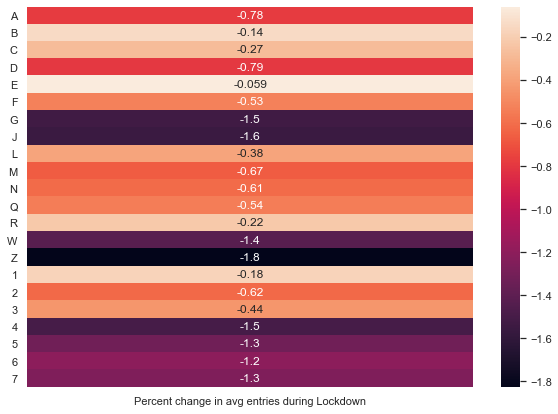

In [95]:
#heatmap showing percentage change of avg daily number from pre-covid to lockdown

fig, ax = plt.subplots(figsize=(10,7))
lock_change = sns.heatmap(lockdown_percent_changes, annot=True,
                          yticklabels=["A","B","C","D","E","F","G","J","L","M","N","Q","R","W","Z",
                                      "1","2","3","4","5","6","7"],
                         xticklabels=["Percent change in avg entries during Lockdown"])
plt.yticks(rotation=0);

In [99]:
reopening_percent_changes = pd.DataFrame({"Reopening": [A_reopen_percent_change,
                                                      B_reopen_percent_change,
                                                      C_reopen_percent_change,
                                                      D_reopen_percent_change,
                                                      E_reopen_percent_change,
                                                      F_reopen_percent_change,
                                                      G_reopen_percent_change,
                                                      J_reopen_percent_change,
                                                      L_reopen_percent_change,
                                                      M_reopen_percent_change,
                                                      N_reopen_percent_change,
                                                      Q_reopen_percent_change,
                                                      R_reopen_percent_change,
                                                      W_reopen_percent_change,
                                                      Z_reopen_percent_change,
                                                      _1reopen_percent_change,
                                                      _2reopen_percent_change,
                                                      _3reopen_percent_change,
                                                      _4reopen_percent_change,
                                                      _5reopen_percent_change,
                                                      _6reopen_percent_change,
                                                      _7reopen_percent_change]})

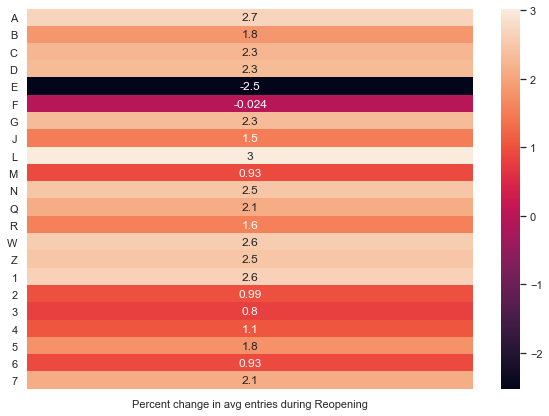

In [100]:
#heatmap showing percentage change of avg daily number from lockdown to reopening
fig, ax = plt.subplots(figsize=(10,7))
reopen_change = sns.heatmap(reopening_percent_changes, annot=True,
                           yticklabels=["A","B","C","D","E","F","G","J","L","M","N","Q","R","W","Z",
                                       "1","2","3","4","5","6","7"],
                           xticklabels=["Percent change in avg entries during Reopening"])
plt.yticks(rotation=0);